In [57]:
from scipy.stats import norm
import pylab as p
import numpy as np

I have imported everything I need in the above cell.  Now I need to set up the basic information from kenpom to calculate win probabilities, etc.  I need four pieces of data from kenpom: adjusted efficiency margin for each team (AdjEM), and the adjusted tempo for each team (AdjT).  AdjEM measures the point differential expected if a team were to play the "average" team over 100 possessions.  Adjusted tempo is the average number of possessions by a team over a 40 minute game.  I then calculate the point differential expected when team A plays team B over 40 minutes.    

In [62]:
# Purdue, Northwestern on 3/5/17
kpEMa, kpEMb = 24.31, 15.83
kpTa, kpTb = 69.5, 65.8
homeadv = 3.5
kpEMtempo = (69.5 + 65.8)/200
# Number of points A should win by on neutral floor
kpEMdiff = (kpEMa - kpEMb)*kpEMtempo
# Number of points A should win by on oponents floor
kpEMdiff = (kpEMa - kpEMb)*kpEMtempo - homeadv

We can visualize this information by using a typical bell cure (normal distribution).  The important part here is the standard deviation.  The variable “kpEMdiff” is how many points team A is favored by.  If this number is negative, then team B would be favored.  The zero point is where it switches from team A winning to team B winning.  The area under the curve is 1.0, and the red shaded area represents the probability that team B would win, and the blue area represents the probability that team B would win.  What is plotted is the probability density function (pdf). 

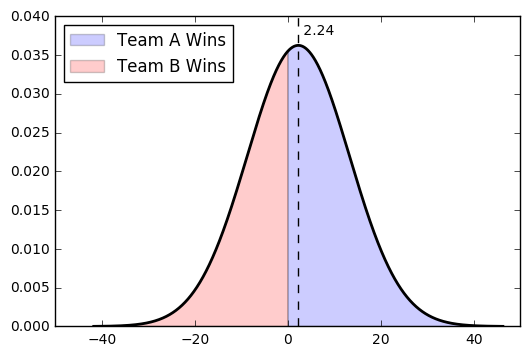

In [61]:
stdev = 11

x = np.arange(kpEMdiff - 4.0*stdev, kpEMdiff + 4.0*stdev, 0.01)
y = norm.pdf(x, kpEMdiff, stdev) 
p.plot(x,y, color='k', lw=2)
p.fill_between(x,0,y, where=x >= 0, facecolor='blue', alpha=0.2,label='Team A Wins')
p.fill_between(x,0,y, where=x <= 0, facecolor='red', alpha=0.2,label='Team B Wins')
p.axvline(kpEMdiff, c='k',ls='--')
p.annotate('{0:5.2f}'.format(kpEMdiff),xy=(1.05*kpEMdiff,1.04*y.max()))
p.legend(loc=2)
p.show()


There is a function that defines the areas under the curve, i.e., the probabilities directly, which is called the cumulative density function (CDF). We can use this CDF directly to calculate the probability of team A or team B winning.  

In [66]:
teamBprob = norm.cdf(0, kpEMdiff, stdev)
teamAprob = 1 - teamBprob

print 'Team A: {0:6.4f}\nTeam B: {1:6.4f}'.format(teamAprob, teamBprob)

Team A:0.5806
Team B:0.4194
